# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombre: Leonardo Ortega Trujillo
*Métodos computacionales 2024-II*

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy as sc
from scipy.integrate import solve_ivp
from scipy.integrate import *

# 1
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

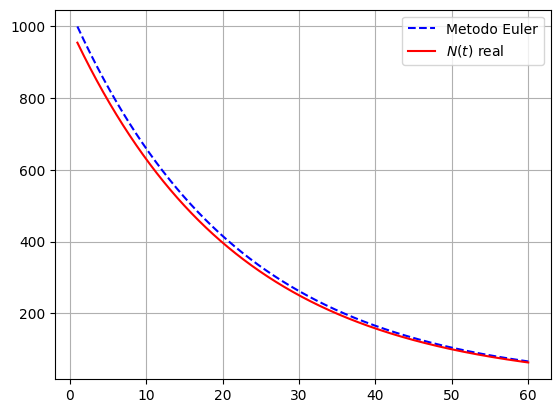

In [ ]:
def euler_method(f, x0, y0, h, x_end):
    """
    Implementación del método de Euler
    f: función que define la EDO dy/dx = f(x,y)
    x0, y0: condición inicial
    h: tamaño del paso
    x_end: valor final de x
    """
    # Calcular el número de pasos
    n_steps = int((x_end - x0) / h)

    # Inicializar arreglos
    x = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)

    # Establecer condición inicial
    x[0] = x0
    y[0] = y0

    # Iterar aplicando el método de Euler
    for i in range(n_steps):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h * f(y[i])

    return x, y

N_0 = 1000
t0 = 1
t_end = 60
t_12 = 15 #horas
lamb = np.log(2)/t_12

def dN_dt(N):
  return -lamb*N

h = 0.01
t , N = euler_method(dN_dt,t0,N_0,h,t_end)
N_real = lambda t: N_0*np.exp(-lamb*t)

t_values = np.arange(t0,t_end,h)
t_vals = np.linspace(t0,t_end,100)

plt.plot(t,N,color = 'b',linestyle="dashed", label = 'Metodo Euler')
plt.plot(t_values,N_real(t_values),'r-',label= '$N(t)$ real')
plt.legend()
plt.grid()
plt.show()

# 2
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es

$$\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t} $$

Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


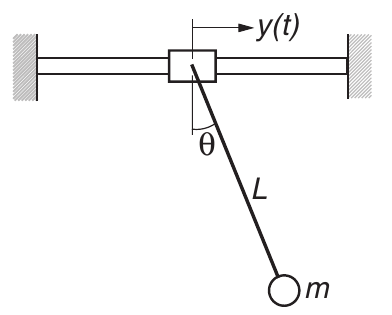

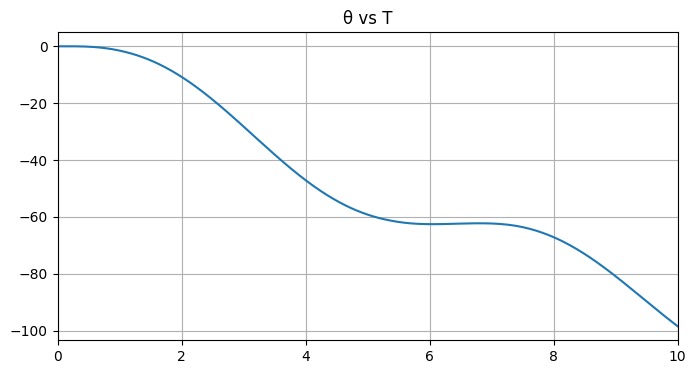

In [ ]:
g = 9.8 #m/2
L = 1.0 #m
Y = 0.25 #m
w = 2.5 #rad/s
#cond. Iniciales
theta_0 = 0
theta_prime_0 = 0.1 #rad

def Euler_2(f,t0,t_end,q0,I0,h):
  n =int((t_end - t0) / h)
  t = np.zeros(n+1)
  q = np.zeros(n+1)
  I = np.zeros(n+1)
  #condiciones iniciales
  t[0] = t0
  q[0] = q0
  I[0] = I0

  #Euler
  for i in range(n):
    t[i+1] = t[i] + h
    q[i+1] = q[i] + h*I[i]
    I[i+1] = I[i] + h*f(t[i],q[i])

  return t,q,I

def theta_2(theta,t):
  return -(g/L)*np.sin(theta) + (w**2/L)* Y * np.cos(theta) * np.sin(w*t)

theta_euler = Euler_2(theta_2,theta_0,10,0,0.1,h)

plt.figure(figsize=(8,4))
plt.plot(theta_euler[0],theta_euler[1])
plt.title('θ vs T')
plt.xlim(0,10)
plt.grid()
plt.show()

# 3
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

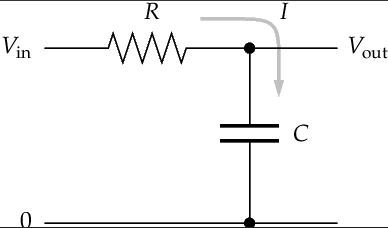


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


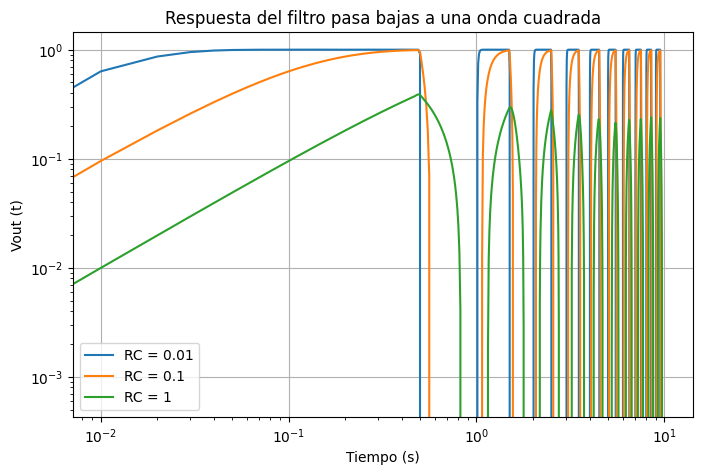

In [ ]:
#funciones a usar
def square_wave(t):
    if np.floor(2*t) % 2 ==0:
      return 1
    else:
      return -1

def lowpass_filter(t, Vout, RC):
    Vin = square_wave(t)
    return (Vin - Vout) / RC

t_span = (0, 10)  #intervalo
t_eval = np.linspace(0, 10, 1000)  #puntos a evaluar
V0 = [0]  #condicion inicial
RC_values = [0.01, 0.1, 1] #valores de RC

plt.figure(figsize=(8, 5))
for RC in RC_values:
    sol = solve_ivp(lowpass_filter, t_span, V0, args=(RC,), method='RK45', t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'RC = {RC}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Vout (t)')
plt.yscale('log')
plt.xscale('log')
plt.title('Respuesta del filtro pasa bajas a una onda cuadrada')
plt.legend()
plt.grid()
plt.show()

# 4


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [ ]:
g = 9.8  #gravedad
l = 1.0   #longitud del péndulo
#sistema de ecuaciones de primer orden, haciendo v = (d**2u/dt**2)

def pendulo(t, y):
    u, v = y  # y[0] = u (ángulo), y[1] = v (velocidad angular)
    return [v, -g/l * np.sin(u)]  #derivadas: [du/dt, dv/dt]

#periodo aproximado
def periodo_numerico(u0):
    t_span = (0, 10)  #span para el RK45
    y0 = [u0, 0]  #cond. iniciales

    #uso de Runge-Kutta
    sol = solve_ivp(pendulo, t_span, y0, method='RK45', max_step=0.001)

    #encontrar los tiempos donde u cambia de signo (cruces por cero de la velocidad)
    cruz = np.where(np.diff(np.sign(sol.y[1])))[0]

    if len(cruz) < 2:
        return None

    T = 2 * (sol.t[cruz[1]] - sol.t[cruz[0]])  #periodo
    return T

#valores de u0
gu0 = np.linspace(0, np.pi, 50)

T_num = np.array([periodo_numerico(u) for u in gu0],dtype=np.float64)

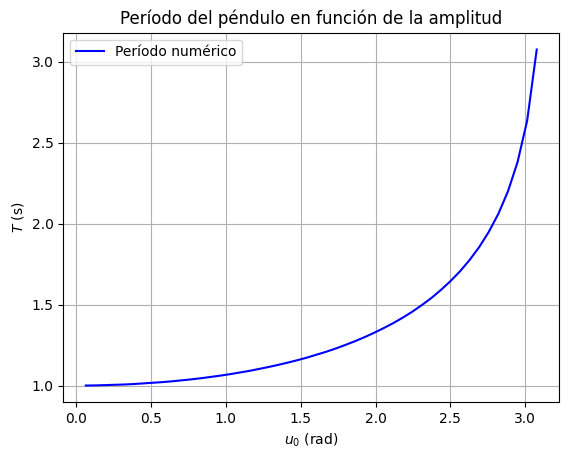

In [ ]:
#grafica
T_0 = 2 * np.pi * np.sqrt(l / g)
T_plot = T_num/T_0

plt.plot(gu0, T_plot, 'b-', label='Período numérico')
plt.xlabel('$u_0$ (rad)')
plt.ylabel('$T$ (s)')
plt.legend()
plt.grid()
plt.title('Período del péndulo en función de la amplitud')
plt.show()

# 5

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.
---------------------------------------------

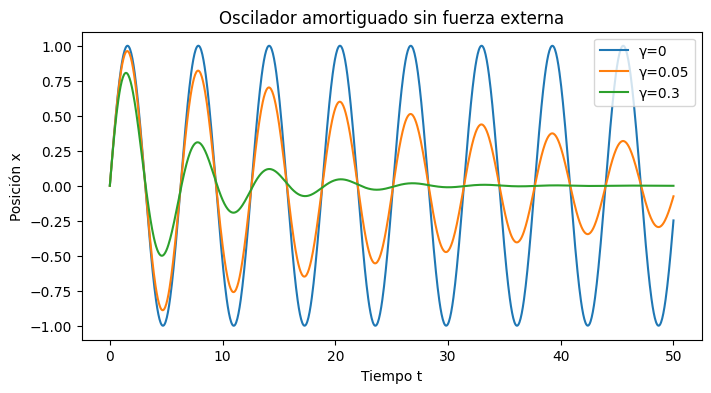

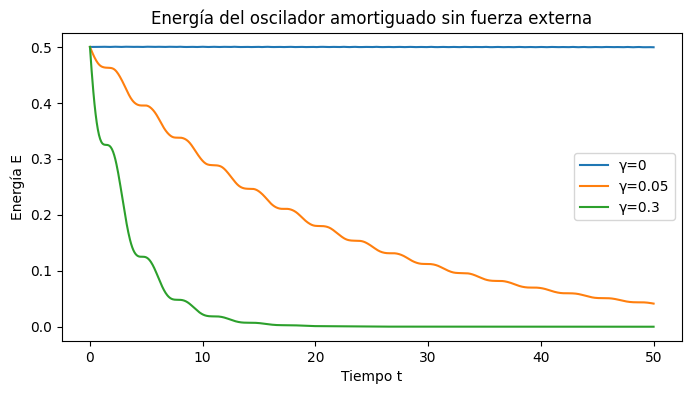

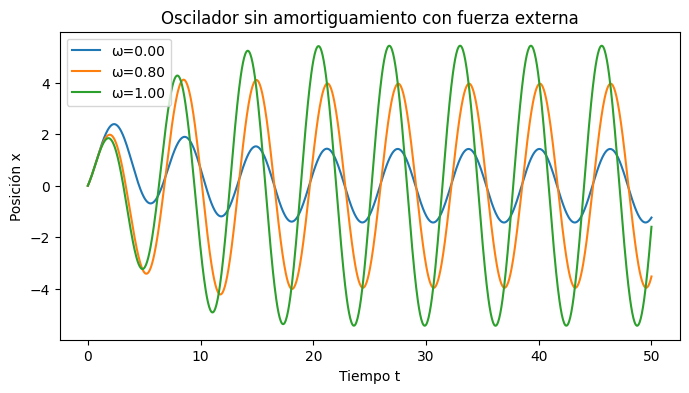

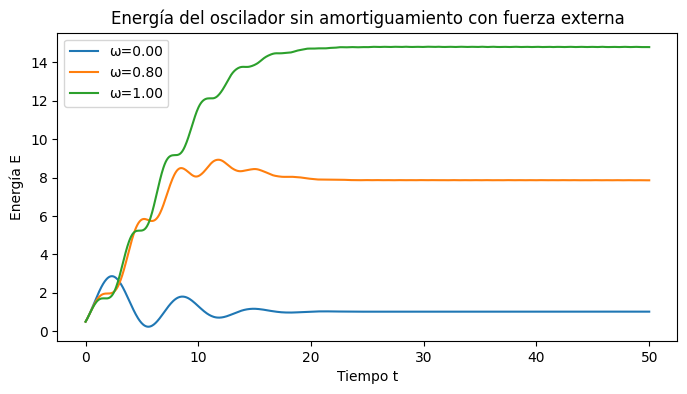

In [ ]:
def oscilador(t, y, gamma, w0, F_func, m):
    x, v = y #cond. iniciales
    F = F_func(t) #funcion forzadora
    dxdt = v #ecuacion de x
    dvdt = (F/m) - gamma*v - w0**2 * x #ecuacion de v
    return [dxdt, dvdt]

def fuerza_caso2(t, F0, w, T):
    return F0 * np.cos(w * t) * np.exp(-t**2 / T**2) #fuerza forzadora del caso 2

#parametros
m = 1.0   #masa
k = 1.0  #const resorte
w_0 = np.sqrt(k/m)  #frec. natural
y = [0,1] #cond. iniciales x(0) = 0, v(0) = 1

#tiempo y parametros para resolver el sist de ecuaciones
t_span = (0, 50) #span
t_eval = np.linspace(*t_span, 1000) #para evaluar

# Caso 1: F=0 con diferentes gammas
gamma_values = [0, 0.05, 0.3] #valores de gamma
soluciones_caso1 = [] # lista para tener las diferentes soluciones segun el gamma

for gamma in gamma_values:
    sol = solve_ivp(oscilador, t_span, y, args=(gamma, w_0, lambda t: 0, m), t_eval=t_eval)
    soluciones_caso1.append(sol)

#grafica de x(t) caso 1 con fuerza forzadora = 0
plt.figure(figsize=(8, 4))
for sol, gamma in zip(soluciones_caso1, gamma_values):
    plt.plot(sol.t, sol.y[0], label=f'γ={gamma}')
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.legend()
plt.title('Oscilador amortiguado sin fuerza externa')
plt.show()

#grafica de energía E(t) para el caso 1
plt.figure(figsize=(8, 4))
for sol, gamma in zip(soluciones_caso1, gamma_values):
    E = 0.5 * m * sol.y[1]**2 + 0.5 * k * sol.y[0]**2
    plt.plot(sol.t, E, label=f'γ={gamma}')
plt.xlabel('Tiempo t')
plt.ylabel('Energía E')
plt.legend()
plt.title('Energía del oscilador amortiguado sin fuerza externa')
plt.show()

#caso 2: fuerza forzadora no nula con diferentes frecuencias
F0, T = 1.0, 10.0 #condiciones iniciales
omega_values = [0, 0.8*w_0, w_0] #valores de w0
soluciones_caso2 = [] #lista para guardar la soluciones
for omega in omega_values:
    F_func = lambda t: fuerza_caso2(t, F0, omega, T) #fuerza forzadora
    sol = solve_ivp(oscilador, t_span, y, args=(0, w_0, F_func, m), t_eval=t_eval)
    soluciones_caso2.append(sol)

#graficar soluciones de x(t) para el caso 2
plt.figure(figsize=(8, 4))
for sol, omega in zip(soluciones_caso2, omega_values):
    plt.plot(sol.t, sol.y[0], label=f'ω={omega:.2f}')
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.legend()
plt.title('Oscilador sin amortiguamiento con fuerza externa')
plt.show()

# Graficar energía E(t) para el caso 2
plt.figure(figsize=(8, 4))
for sol, omega in zip(soluciones_caso2, omega_values):
    E = 0.5 * m * sol.y[1]**2 + 0.5 * k * sol.y[0]**2
    plt.plot(sol.t, E, label=f'ω={omega:.2f}')
plt.xlabel('Tiempo t')
plt.ylabel('Energía E')
plt.legend()
plt.title('Energía del oscilador sin amortiguamiento con fuerza externa')
plt.show()


# 6

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

--------------------------------------------------------

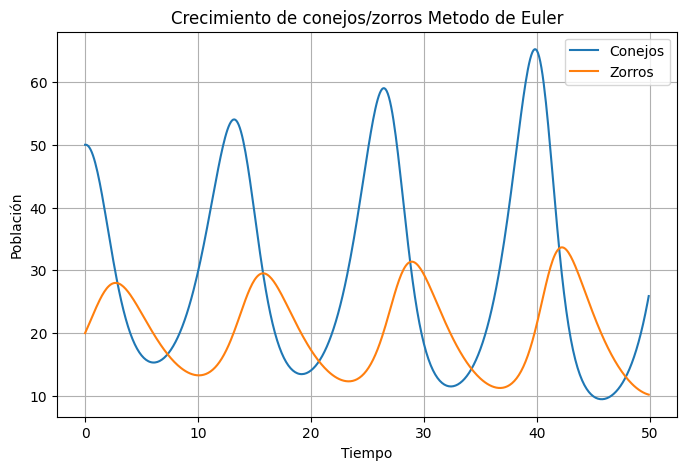

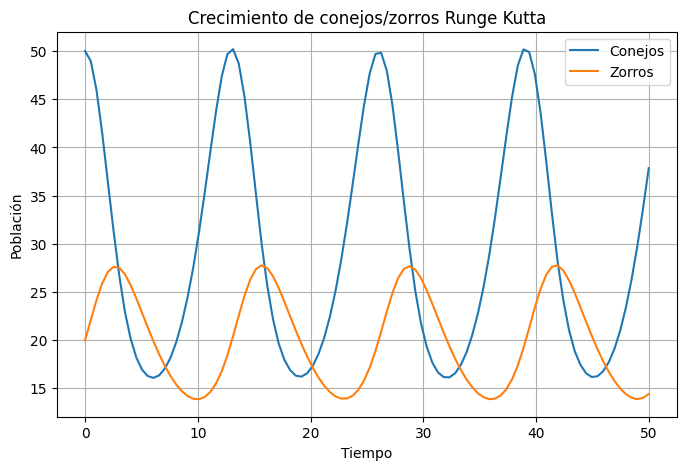

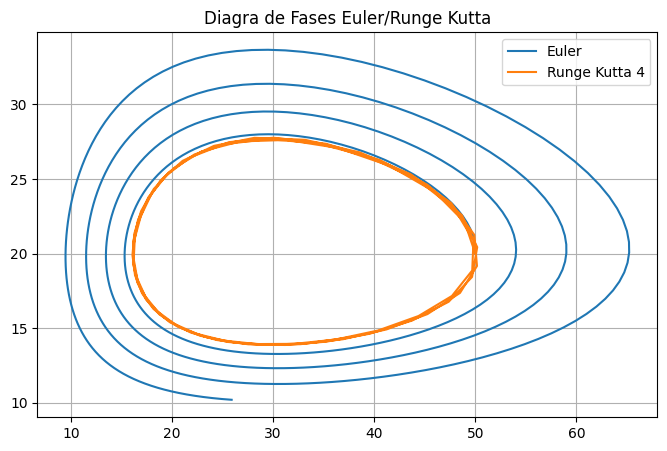

In [20]:
def metodo_euler(f, z0, h, t_max):
    t_values = np.arange(0, t_max, h)  # Definimos el tiempo
    z_values = np.zeros((len(t_values), len(z0)))  # Inicializamos array de soluciones

    z_values[0] = z0  # Condiciones iniciales

    for i in range(1, len(t_values)):
        z_values[i] = z_values[i - 1] + h * np.array(f(t_values[i - 1], z_values[i - 1]))

    return t_values, z_values

def granja(t,z):
  #parametros
  x,y = z
  alpha = 0.8
  beta = 0.04
  gamma = 0.3
  delta = 0.01
  #ecuaciones
  dx_dt = alpha*x - beta*x*y
  dy_dt = -gamma*y + delta*x*y

  return [dx_dt,dy_dt]

#cond iniciales y parametros
z = [50,20] #50 conejos, 20 zorros
h_vals = [0.1,0.5,0.05] #paso temporal
t_50 = 50 #evolucion del tiempo 50 unidades
tspan = (0,50)
t_space = np.linspace(0,50,100)

#metodo de euler
t_eu,sol_eu = metodo_euler(granja,z,h_vals[0],t_50)
x_euler, y_euler = sol_eu[:, 0], sol_eu[:, 1]

#Runge Kutta
sol_RK2 = solve_ivp(granja, tspan, z, method='RK23' ,t_eval=t_space)
x_RK2, y_RK2 = sol_RK2.y

sol_RK4 = solve_ivp(granja, tspan, z, method='RK45' ,t_eval=t_space)
x_RK4, y_RK4 = sol_RK4.y


#grafica con el metodo de Euler
plt.figure(figsize=(8,5))
plt.plot(t_eu, x_euler, label="Conejos")
plt.plot(t_eu, y_euler, label="Zorros")
plt.title('Crecimiento de conejos/zorros Metodo de Euler')
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.grid()
plt.show()

#grafica Runge Kutta:
plt.figure(figsize=(8,5))
plt.plot(sol_RK4.t, x_RK4, label="Conejos")
plt.plot(sol_RK4.t, y_RK4, label="Zorros")
plt.title('Crecimiento de conejos/zorros Runge Kutta')
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.grid()
plt.show()

#grafica de fase Euler:
plt.figure(figsize=(8,5))
plt.plot(x_euler,y_euler,label='Euler')
plt.plot(x_RK4,y_RK4,label='Runge Kutta 4')
plt.legend()
plt.title('Diagra de Fases Euler/Runge Kutta')
plt.grid()
plt.show()

# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  
--------------------------------------

Para convertirlo en un sistema de primer orden, utilizamos la definición:
$$
\begin{aligned}
y_1 &= \theta_1, \\
y_2 &= \dot{\theta}_1, \\
y_3 &= \theta_2, \\
y_4 &= \dot{\theta}_2.
\end{aligned}
$$

Entonces, el sistema de primer orden queda:

$$
\begin{aligned}
\dot{y}_1 &= y_2, \\
\dot{y}_2 &= -\frac{g}{L}y_1 - \frac{k}{m}(y_1 - y_3), \\
\dot{y}_3 &= y_4, \\
\dot{y}_4 &= -\frac{g}{L}y_3 - \frac{k}{m}(y_3 - y_1).
\end{aligned}
$$

El sistema de ecuaciones diferenciales de primer orden puede escribirse en forma matricial como:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{y} = [y_1, y_2, y_3, y_4]^T$ y la matriz $\mathbf{A}$ es:

$$
\mathbf{A} = \begin{bmatrix}
0 & 1 & 0 & 0 \\
-\left(\frac{g}{L} + \frac{k}{m}\right) & 0 & \frac{k}{m} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{m} & 0 & -\left(\frac{g}{L} + \frac{k}{m}\right) & 0
\end{bmatrix}.
$$


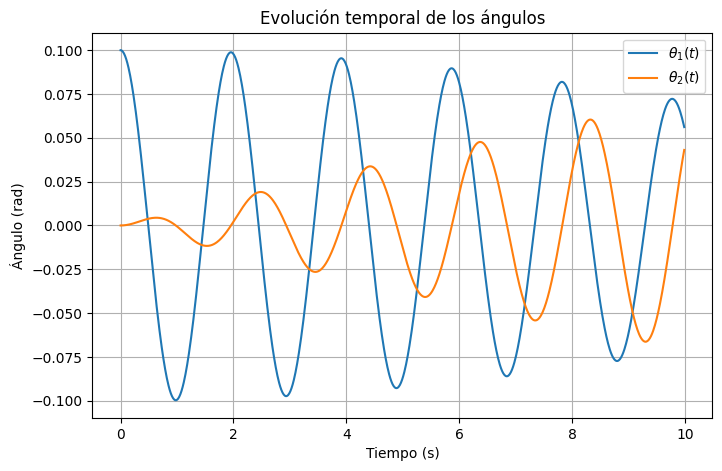

In [ ]:
#parametros
m = 1.0  # kg
L = 1.0  # m
g = 9.81  # m/s²
k = 0.5  # N/m

#cond. iniciales
y0 = np.array([0.1, 0.0, 0.0, 0.0])

# Intervalo de simulación
t_start = 0.0
t_end = 10.0
dt = 0.01
t = np.arange(t_start, t_end, dt)

# Definición de la matriz A
A = np.array([
    [0, 1, 0, 0],
    [-(g/L + k/m), 0, k/m, 0],
    [0, 0, 0, 1],
    [k/m, 0, -(g/L + k/m), 0]
])

# Función para el sistema de ecuaciones diferenciales
def system(t, y):
    return A @ y

sol = solve_ivp(system, (t_start,t_end), y0, method='RK45', t_eval=t)

# Extraemos las soluciones
t_sol = sol.t
theta1_sol = sol.y[0]
theta1_dot_sol = sol.y[1]
theta2_sol = sol.y[2]
theta2_dot__sol = sol.y[3]

# Gráfica de la evolución temporal de los ángulos
plt.figure(figsize=(8, 5))
plt.plot(t, theta1_sol, label=r'$\theta_1(t)$')
plt.plot(t, theta2_sol, label=r'$\theta_2(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Evolución temporal de los ángulos')
plt.legend()
plt.grid()
plt.show()

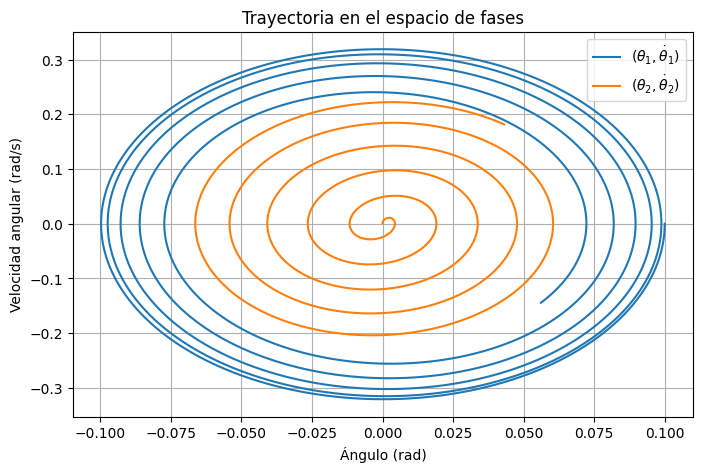

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(theta1_sol, theta1_dot_sol, label=r'$(\theta_1, \dot{\theta}_1)$')
plt.plot(theta2_sol, theta2_dot__sol, label=r'$(\theta_2, \dot{\theta}_2)$')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Trayectoria en el espacio de fases')
plt.legend()
plt.grid()
plt.show()

# 8
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter

**obviado**

----------------------------------------------------

# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


In [60]:
#parametros
V0 = 100  # km/s (velocidad de rotación)
r = 8     # kpc, radio
k = np.sqrt(2) * (V0 / r)  #freq epiciclo

def Jeans(t,y):
  sigma,v = y #vector de variables
  #ecuaciones
  dsigma_dt = v
  dvdt = -(k**2) * sigma

  return [dsigma_dt,dvdt]

#cond iniciales
Sigma0 = 1.0  #densidad inicial
v0 = 0.0  # velocidad inicial, reposo
y0 = [Sigma0, v0]

#tiempos
t_span = (0, 10)  #span de tiempo
t_space = np.linspace(0, 10, 300)  #espacio donde evaluar la solucion

#solucion
sol = solve_ivp(Jeans, t_span, y0, method='RK45', t_eval=t_space)

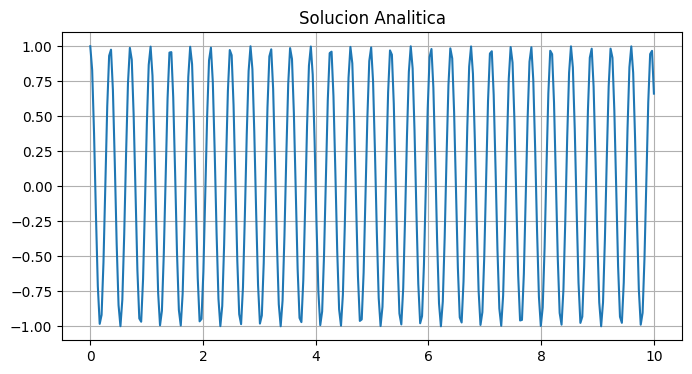

In [61]:
#la solucion analitica de la ecuacion es una similar a la de un oscilador armonico como un pendulo.

sol_analitica = Sigma0 * np.cos(k * t_space)

plt.figure(figsize=(8,4))
plt.plot(t_space,sol_analitica)
plt.title('Solucion Analitica')
plt.grid()
plt.show()

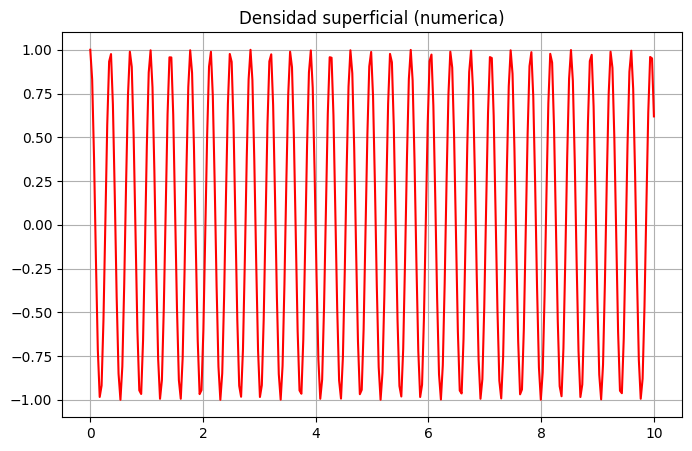

In [62]:
#grafica
plt.figure(figsize=(8,5))
plt.plot(sol.t,sol.y[0],'r-')
plt.title('Densidad superficial (numerica)')
plt.grid()
plt.show()

In [63]:
#matriz
A = np.array([[0, 1],
              [-k**2, 0]])

#valores propios, vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"Valores propios de la matriz A:\n{eigenvalues}")

print(f"\nVectores propios asociados:\n{eigenvectors}")

Valores propios de la matriz A:
[0.+17.67766953j 0.-17.67766953j]

Vectores propios asociados:
[[0.        -0.05647825j 0.        +0.05647825j]
 [0.99840383+0.j         0.99840383-0.j        ]]


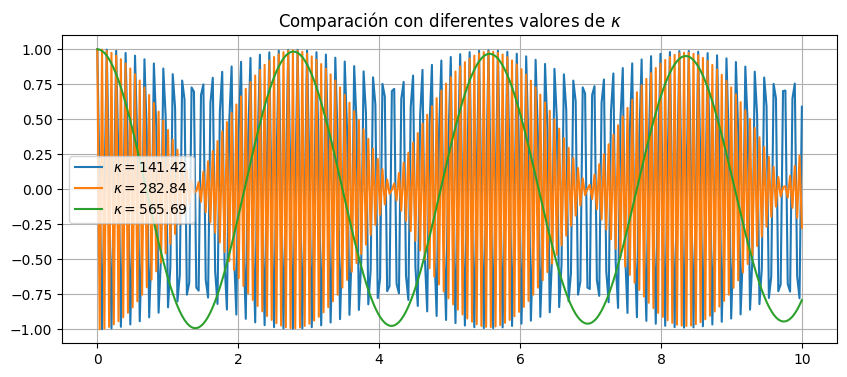


 Se nota que a medida que el k aumenta de valor, el sigma se va pareciendo más a una solucion en senos y cosenos que sería lo esperado,
 se nota una mayor definicion de la funcion como en esta grafica con k = 565.69.


In [68]:
#evolucion del sistema para diferentes k
k_values = [0.5 * k, k, 2 * k]  # Diferentes frecuencias

plt.figure(figsize=(10, 4))
for k in k_values:
    sol_test = solve_ivp(lambda t, y: [y[1], -k**2 * y[0]], t_span, y0, t_eval=t_eval)
    plt.plot(t_eval, sol_test.y[0], label=f"$\kappa = {k:.2f}$")

plt.title("Comparación con diferentes valores de $\kappa$")
plt.legend()
plt.grid()
plt.show()

print('\n Se nota que a medida que el k aumenta de valor, el sigma se va pareciendo más a una solucion en senos y cosenos que sería lo esperado,\n se nota una mayor definicion de la funcion como en esta grafica con k = 565.69.')